In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%run ../../helper/preprocess.py
%run ../../helper/aggregate.py
%run ../../helper/utils.py
%run xy_plot.py

matplotlib.rcParams['pdf.fonttype'] = 42
sns.set(style="white", font_scale=1.8)
figsize = (24, 6)
figsize_large = (24, 12)
bbox_to_anchor = (0.5, -0.1)

In [2]:
metric_types = [
    'Image Similarity', 'Image Similarity', 'Image Similarity',
    'Squared Centroid Distance', 'Text Similarity', 'Vendi', 'Style Loss'
]
encoders = [
    'DINOv2', 'ConvNeXt V2', 'CLIP', 'DINOv2', 'CLIP', 'DINOv2', 'Vgg19'
]
modes = ['padding']
prompt_types = ['in', 'trigger', 'out']

metrics_to_include = get_metric_list(metric_types,
                                     encoders,
                                     modes,
                                     prompt_types,
                                     style_with_base_model=True)
display(metrics_to_include)

[('Image Similarity', 'DINOv2-padding', 'in'),
 ('Image Similarity', 'DINOv2-padding', 'trigger'),
 ('Image Similarity', 'DINOv2-padding', 'out'),
 ('Image Similarity', 'ConvNeXt V2-padding', 'in'),
 ('Image Similarity', 'ConvNeXt V2-padding', 'trigger'),
 ('Image Similarity', 'ConvNeXt V2-padding', 'out'),
 ('Image Similarity', 'CLIP-padding', 'in'),
 ('Image Similarity', 'CLIP-padding', 'trigger'),
 ('Image Similarity', 'CLIP-padding', 'out'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'in'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'trigger'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'out'),
 ('Text Similarity', 'CLIP', 'in'),
 ('Text Similarity', 'CLIP', 'trigger'),
 ('Text Similarity', 'CLIP', 'out'),
 ('Vendi', 'DINOv2', 'in'),
 ('Vendi', 'DINOv2', 'trigger'),
 ('Vendi', 'DINOv2', 'out'),
 ('Style Loss', 'Vgg19', 'in'),
 ('Style Loss', 'Vgg19', 'trigger'),
 ('Style Loss', 'Vgg19', 'out'),
 ('Style Loss', 'Vgg19', 'base model')]

In [3]:
metrics_to_plot = [(('Text Similarity', 'CLIP', 'out'),
                    ('Image Similarity', 'DINOv2-padding', 'out')),
                   (('Vendi', 'DINOv2', 'trigger'),
                    ('Squared Centroid Distance', 'DINOv2-padding',
                     'trigger')),
                   (('Style Loss', 'Vgg19', 'base model'),
                    ('Image Similarity', 'DINOv2-padding', 'in'))]

# Captions

In [21]:
metrics_file = '../../metrics/captions_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    rank=False,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude)

save_dir = f'figures/add-captions/'
os.makedirs(save_dir, exist_ok=True)

In [40]:
def rank_within_group(group):
    """Computes the scaled rank for each column in the group."""
    group_size = len(group)

    # Standard rank function, where highest score gets highest rank
    standard_ranking = group.rank(ascending=True)-1

    # Distance metric rank function, where lowest score gets highest rank
    distance_ranking = (group.rank(ascending=False)-1) / (group_size-1)

    # Apply the appropriate ranking method based on the column's presence
    # in distance_metrics
    for column in group.columns:
        group[column] = standard_ranking[column]
    group['size'] = group_size

    return group

In [41]:
metrics_processed_ranked = metrics_processed.groupby(['Category', 'Class', 'Subclass']).apply(rank_within_group)

In [42]:
metrics_processed_ranked

Config  Algo Preset    Lr   Dim Alpha Factor Caption  Seed  Step  \
Architecture                                                                    
Condition                                                                       
0              22.0  67.0   53.5  67.0  67.0  13.0   13.0    17.5  17.5  53.5   
1              22.0  67.0   53.5  67.0  67.0  13.0   13.0    17.5  17.5  53.5   
2              22.0  67.0   53.5  67.0  67.0  13.0   13.0    17.5  17.5  53.5   
3              22.0  67.0   53.5  67.0  67.0  13.0   13.0    17.5  17.5  53.5   
4              22.0  67.0   53.5  67.0  67.0  13.0   13.0    17.5  17.5  53.5   
...             ...   ...    ...   ...   ...   ...    ...     ...   ...   ...   
4207          103.0  13.0   53.5  13.0   NaN   NaN    NaN    89.5  17.5  89.5   
4208          103.0  13.0   53.5  13.0   NaN   NaN    NaN    89.5  17.5  89.5   
4209          103.0  13.0   53.5  13.0   NaN   NaN    NaN    89.5  17.5  89.5   
4210          103.0  13.0   53.5  13.0   NaN   NaN    NaN    89.5  17.5  89.5   
4211          103.0  13.0   53.5  13.0   NaN   NaN    NaN    89.5  17.5  89.5   

              ... Style Loss             Text Similarity                Vendi  \
Architecture  ...      Vgg19                        CLIP               DINOv2   
Condition     ...         in out trigger              in   out trigger     in   
0             ...        NaN NaN     NaN            98.0  78.0   101.0   12.0   
1             ...        NaN NaN     NaN            64.0  57.0    83.0   18.0   
2             ...        NaN NaN     NaN            83.0  77.0   106.0   57.0   
3             ...        NaN NaN     NaN            63.0  62.0    36.0   15.0   
4             ...        NaN NaN     NaN           102.0  54.0    94.0   69.0   
...           ...        ...  ..     ...             ...   ...     ...    ...   
4207          ...        NaN NaN     NaN            79.0  87.0   103.0   83.0   
4208          ...        NaN NaN     NaN            48.0  77.0    18.0   95.0   
4209          ...        NaN NaN     NaN            83.0  51.0   100.0   69.0   
4210          ...        NaN NaN     NaN            88.0  62.0    95.0   95.0   
4211          ...        NaN NaN     NaN            69.0  43.0    47.0   99.0   

                           size  
Architecture                     
Condition      out trigger       
0             22.0     3.0  108  
1             96.0     0.0  108  
2             56.0     2.0  108  
3             61.0   104.0  108  
4             52.0    38.0  108  
...            ...     ...  ...  
4207          38.0    44.0  108  
4208          43.0    16.0  108  
4209          66.0    27.0  108  
4210          38.0    89.0  108  
4211          48.0    70.0  108  

[4212 rows x 37 columns]

In [43]:
sorted(list(metrics_processed_ranked[('Image Similarity', 'CLIP-padding', 'in')]))

[0.0,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 1

In [24]:
metrics_processed.groupby(['Category', 'Class', 'Subclass']).count()

/tmp/ipykernel_14967/1287431202.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  metrics_processed.groupby(['Category', 'Class', 'Subclass']).count()


Config Algo Preset   Lr  \
Architecture                                                                    
Condition                                                                       
Category    Class                  Subclass                                     
anime       abukuma                none                  108  108    108  108   
                                   onex outfit           108  108    108  108   
                                   toid outfit           108  108    108  108   
            ikamusume              dca outfit            108  108    108  108   
                                   none                  108  108    108  108   
                                   wafc outfit           108  108    108  108   
            kotomine_kirei                               108  108    108  108   
            tsushima_yoshiko                             108  108    108  108   
            yuuki_makoto                                 108  108    108  108   
people      Admiral_Piett          figurine              108  108    108  108   
                                   reaslitic             108  108    108  108   
            Bodhi_Rook             figurine              108  108    108  108   
                                   illustration          108  108    108  108   
                                   realistic             108  108    108  108   
            K-2SO                                        108  108    108  108   
            Rose_Tico              illustration          108  108    108  108   
                                   realistic             108  108    108  108   
            Saw_Gerrera            afro, illustration    108  108    108  108   
                                   afro, realistic       108  108    108  108   
                                   bald, 3d              108  108    108  108   
                                   bald, realistic       108  108    108  108   
scene       scene_canal                                  108  108    108  108   
            scene_castle                                 108  108    108  108   
            scene_garden                                 108  108    108  108   
            scene_sculpture1                             108  108    108  108   
            scene_waterfall                              108  108    108  108   
stuffed_toy plushie_bunny                                108  108    108  108   
            plushie_lobster                              108  108    108  108   
            plushie_panda                                108  108    108  108   
            plushie_pink                                 108  108    108  108   
            plushie_teddybear                            108  108    108  108   
            plushie_tortoise                             108  108    108  108   
style       felix_vallotton_stroke                       108  108    108  108   
            ghibi                                        108  108    108  108   
            ghibi_alter                                  108  108    108  108   
            impressionism                                108  108    108  108   
            pencil_drawing                               108  108    108  108   
            ukiyo_e                                      108  108    108  108   
            vladimir_borovikovsky                        108  108    108  108   

                                                      Dim Alpha Factor  \
Architecture                                                             
Condition                                                                
Category    Class                  Subclass                              
anime       abukuma                none                81    81     27   
                                   onex outfit         81    81     27   
                                   toid outfit         81    81     27   
            ikamusume              dca outfit       

In [5]:
metrics_processed[['Config', 'Class', 'Image Similarity']]

Config                  Class  \
Architecture                                                           
Condition                                                              
0                        exp-1021-sd15-lokrf8            scene_canal   
1                        exp-1021-sd15-lokrf8           scene_garden   
2                        exp-1021-sd15-lokrf8        scene_waterfall   
3                        exp-1021-sd15-lokrf8           scene_castle   
4                        exp-1021-sd15-lokrf8       scene_sculpture1   
...                                       ...                    ...   
4207          exp-3034-sd15-nt-lr5e-6-alltags                ukiyo_e   
4208          exp-3034-sd15-nt-lr5e-6-alltags          impressionism   
4209          exp-3034-sd15-nt-lr5e-6-alltags  vladimir_borovikovsky   
4210          exp-3034-sd15-nt-lr5e-6-alltags         pencil_drawing   
4211          exp-3034-sd15-nt-lr5e-6-alltags                  ghibi   

             Image Similarity                                          \
Architecture     CLIP-padding                     ConvNeXt V2-padding   
Condition                  in       out   trigger                  in   
0                    0.654138  0.617503  0.623814            0.737905   
1                    0.819296  0.502580  0.840467            0.917424   
2                    0.711174  0.515082  0.716613            0.713663   
3                    0.669459  0.474301  0.464367            0.738344   
4                    0.708876  0.659406  0.697896            0.756297   
...                       ...       ...       ...                 ...   
4207                 0.303558  0.596015  0.607005            0.207711   
4208                 0.291508  0.380869  0.429698            0.147313   
4209                 0.274032  0.389796  0.570932            0.185954   
4210                 0.296055  0.407902  0.419303            0.246364   
4211                 0.396565  0.563374  0.649038            0.239338   

                                                                     
Architecture                     DINOv2-padding                      
Condition          out   trigger             in       out   trigger  
0             0.704723  0.686803       0.584903  0.569696  0.581170  
1             0.476655  0.932366       0.840298  0.361656  0.889972  
2             0.512123  0.774035       0.652613  0.410015  0.697855  
3             0.491336  0.495231       0.701878  0.376105  0.399873  
4             0.693574  0.746026       0.591678  0.564349  0.617332  
...                ...       ...            ...       ...       ...  
4207          0.457940  0.500613       0.158196  0.381424  0.393818  
4208          0.245691  0.274615       0.076178  0.123458  0.172110  
4209          0.236812  0.444919       0.093923  0.162882  0.417050  
4210          0.338451  0.379591       0.113471  0.177404  0.236204  
4211          0.232303  0.345737       0.167049  0.184387  0.234370  

[4212 rows x 11 columns]

In [6]:
metrics_file = '../../metrics/captions_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    rank=True,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude)

save_dir = f'figures/add-captions/'
os.makedirs(save_dir, exist_ok=True)

In [7]:
metrics_processed[['Config', 'Class', 'Image Similarity']]

Config                  Class  \
Architecture                                                           
Condition                                                              
0                        exp-1021-sd15-lokrf8            scene_canal   
1                        exp-1021-sd15-lokrf8           scene_garden   
2                        exp-1021-sd15-lokrf8        scene_waterfall   
3                        exp-1021-sd15-lokrf8           scene_castle   
4                        exp-1021-sd15-lokrf8       scene_sculpture1   
...                                       ...                    ...   
4207          exp-3034-sd15-nt-lr5e-6-alltags                ukiyo_e   
4208          exp-3034-sd15-nt-lr5e-6-alltags          impressionism   
4209          exp-3034-sd15-nt-lr5e-6-alltags  vladimir_borovikovsky   
4210          exp-3034-sd15-nt-lr5e-6-alltags         pencil_drawing   
4211          exp-3034-sd15-nt-lr5e-6-alltags                  ghibi   

             Image Similarity                                          \
Architecture     CLIP-padding                     ConvNeXt V2-padding   
Condition                  in       out   trigger                  in   
0                    0.635514  0.672897  0.635514            0.672897   
1                    0.598131  0.289720  0.682243            0.635514   
2                    0.336449  0.411215  0.308411            0.364486   
3                    0.691589  0.299065  0.056075            0.607477   
4                    0.485981  0.495327  0.401869            0.570093   
...                       ...       ...       ...                 ...   
4207                 0.163551  0.448598  0.242991            0.163551   
4208                 0.163551  0.551402  0.672897            0.163551   
4209                 0.163551  0.401869  0.411215            0.163551   
4210                 0.163551  0.710280  0.411215            0.163551   
4211                 0.144860  0.878505  0.953271            0.163551   

                                                                     
Architecture                     DINOv2-padding                      
Condition          out   trigger             in       out   trigger  
0             0.757009  0.542056       0.644860  0.700935  0.682243  
1             0.383178  0.747664       0.757009  0.327103  0.990654  
2             0.504673  0.551402       0.373832  0.467290  0.420561  
3             0.271028  0.028037       0.747664  0.429907  0.056075  
4             0.532710  0.420561       0.420561  0.532710  0.523364  
...                ...       ...            ...       ...       ...  
4207          0.607477  0.728972       0.163551  0.345794  0.121495  
4208          0.317757  0.420561       0.163551  0.168224  0.327103  
4209          0.485981  0.336449       0.163551  0.364486  0.186916  
4210          0.803738  0.850467       0.163551  0.560748  0.439252  
4211          0.588785  0.775701       0.163551  0.635514  0.299065  

[4212 rows x 11 columns]

In [20]:
sorted(list(metrics_processed[('Image Similarity', 'CLIP-padding', 'in')]))

[0.0,
 0.004672897196261682,
 0.004672897196261682,
 0.004672897196261682,
 0.004672897196261682,
 0.004672897196261682,
 0.004672897196261682,
 0.009345794392523364,
 0.009345794392523364,
 0.009345794392523364,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.014018691588785047,
 0.037383177570093455,
 0.037383177570093455,
 0.037383177570093455,
 0.037383177570093455,
 0.037383177570093455,
 0.037383177570093455,
 0.037383177570093455,
 0.037383177570093455,
 0.037383177570093455,
 0.04672897196261682,
 0.04672897196261682,
 0.04672897196261682,
 0.04672897196261682,
 0.04672897196261682,
 0.04672897196261682,
 0.04672897196261682,
 0.04672897196261682,
 0.04672897196261682,
 0.04672897196

In [5]:
metrics_processed

Config  Algo    Preset        Lr  \
Architecture                                                              
Condition                                                                 
0                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
1                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
2                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
3                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
4                        exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500   
...                                       ...   ...       ...       ...   
4207          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4208          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4209          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4210          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   
4211          exp-3034-sd15-nt-lr5e-6-alltags  full  attn-mlp  0.000005   

                  Dim Alpha Factor   Caption Seed Step  ... Style Loss      \
Architecture                                            ...      Vgg19       
Condition                                               ... base model  in   
0             10000.0   1.0    8.0      .txt    a   30  ...   0.672897 NaN   
1             10000.0   1.0    8.0      .txt    a   30  ...   0.551402 NaN   
2             10000.0   1.0    8.0      .txt    a   30  ...   0.579439 NaN   
3             10000.0   1.0    8.0      .txt    a   30  ...   0.700935 NaN   
4             10000.0   1.0    8.0      .txt    a   30  ...   0.467290 NaN   
...               ...   ...    ...       ...  ...  ...  ...        ...  ..   
4207              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4208              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4209              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4210              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   
4211              NaN   NaN    NaN  .txttags    a   50  ...        NaN NaN   

                         Text Similarity                         Vendi  \
Architecture                        CLIP                        DINOv2   
Condition    out trigger              in       out   trigger        in   
0            NaN     NaN        0.915888  0.728972  0.943925  0.112150   
1            NaN     NaN        0.598131  0.532710  0.775701  0.168224   
2            NaN     NaN        0.775701  0.719626  0.990654  0.532710   
3            NaN     NaN        0.588785  0.579439  0.336449  0.140187   
4            NaN     NaN        0.953271  0.504673  0.878505  0.644860   
...           ..     ...             ...       ...       ...       ...   
4207         NaN     NaN        0.738318  0.813084  0.962617  0.775701   
4208         NaN     NaN        0.448598  0.719626  0.168224  0.887850   
4209         NaN     NaN        0.775701  0.476636  0.934579  0.644860   
4210         NaN     NaN        0.822430  0.579439  0.887850  0.887850   
4211         NaN     NaN        0.644860  0.401869  0.439252  0.925234   

                                  
Architecture                      
Condition          out   trigger  
0             0.205607  0.028037  
1             0.897196  0.000000  
2             0.523364  0.018692  
3             0.570093  0.971963  
4             0.485981  0.355140  
...                ...       ...  
4207          0.355140  0.411215  
4208          0.401869  0.149533  
4209          0.616822  0.252336  
4210          0.355140  0.831776  
4211          0.448598  0.654206  

[4212 rows x 30 columns]

In [6]:
metrics_aggregated_all = {}
categories = ['people', 'scene', 'stuffed_toy', 'anime']

for category in categories:
    extra_conodition = {
        'Category': category,
    }
    metrics_aggregated_all[category] = filter_config_and_aggregate(
        metrics_processed, ['Caption'],
        extra_conodition,
        default_keywords=['1001', '1011', '1021', '1034'])
    
shape_mapping = {
    '.txt': 'adjusted tags (default)',
    '.txtdb': 'no tags',
    '.txttags': 'all tags',
}

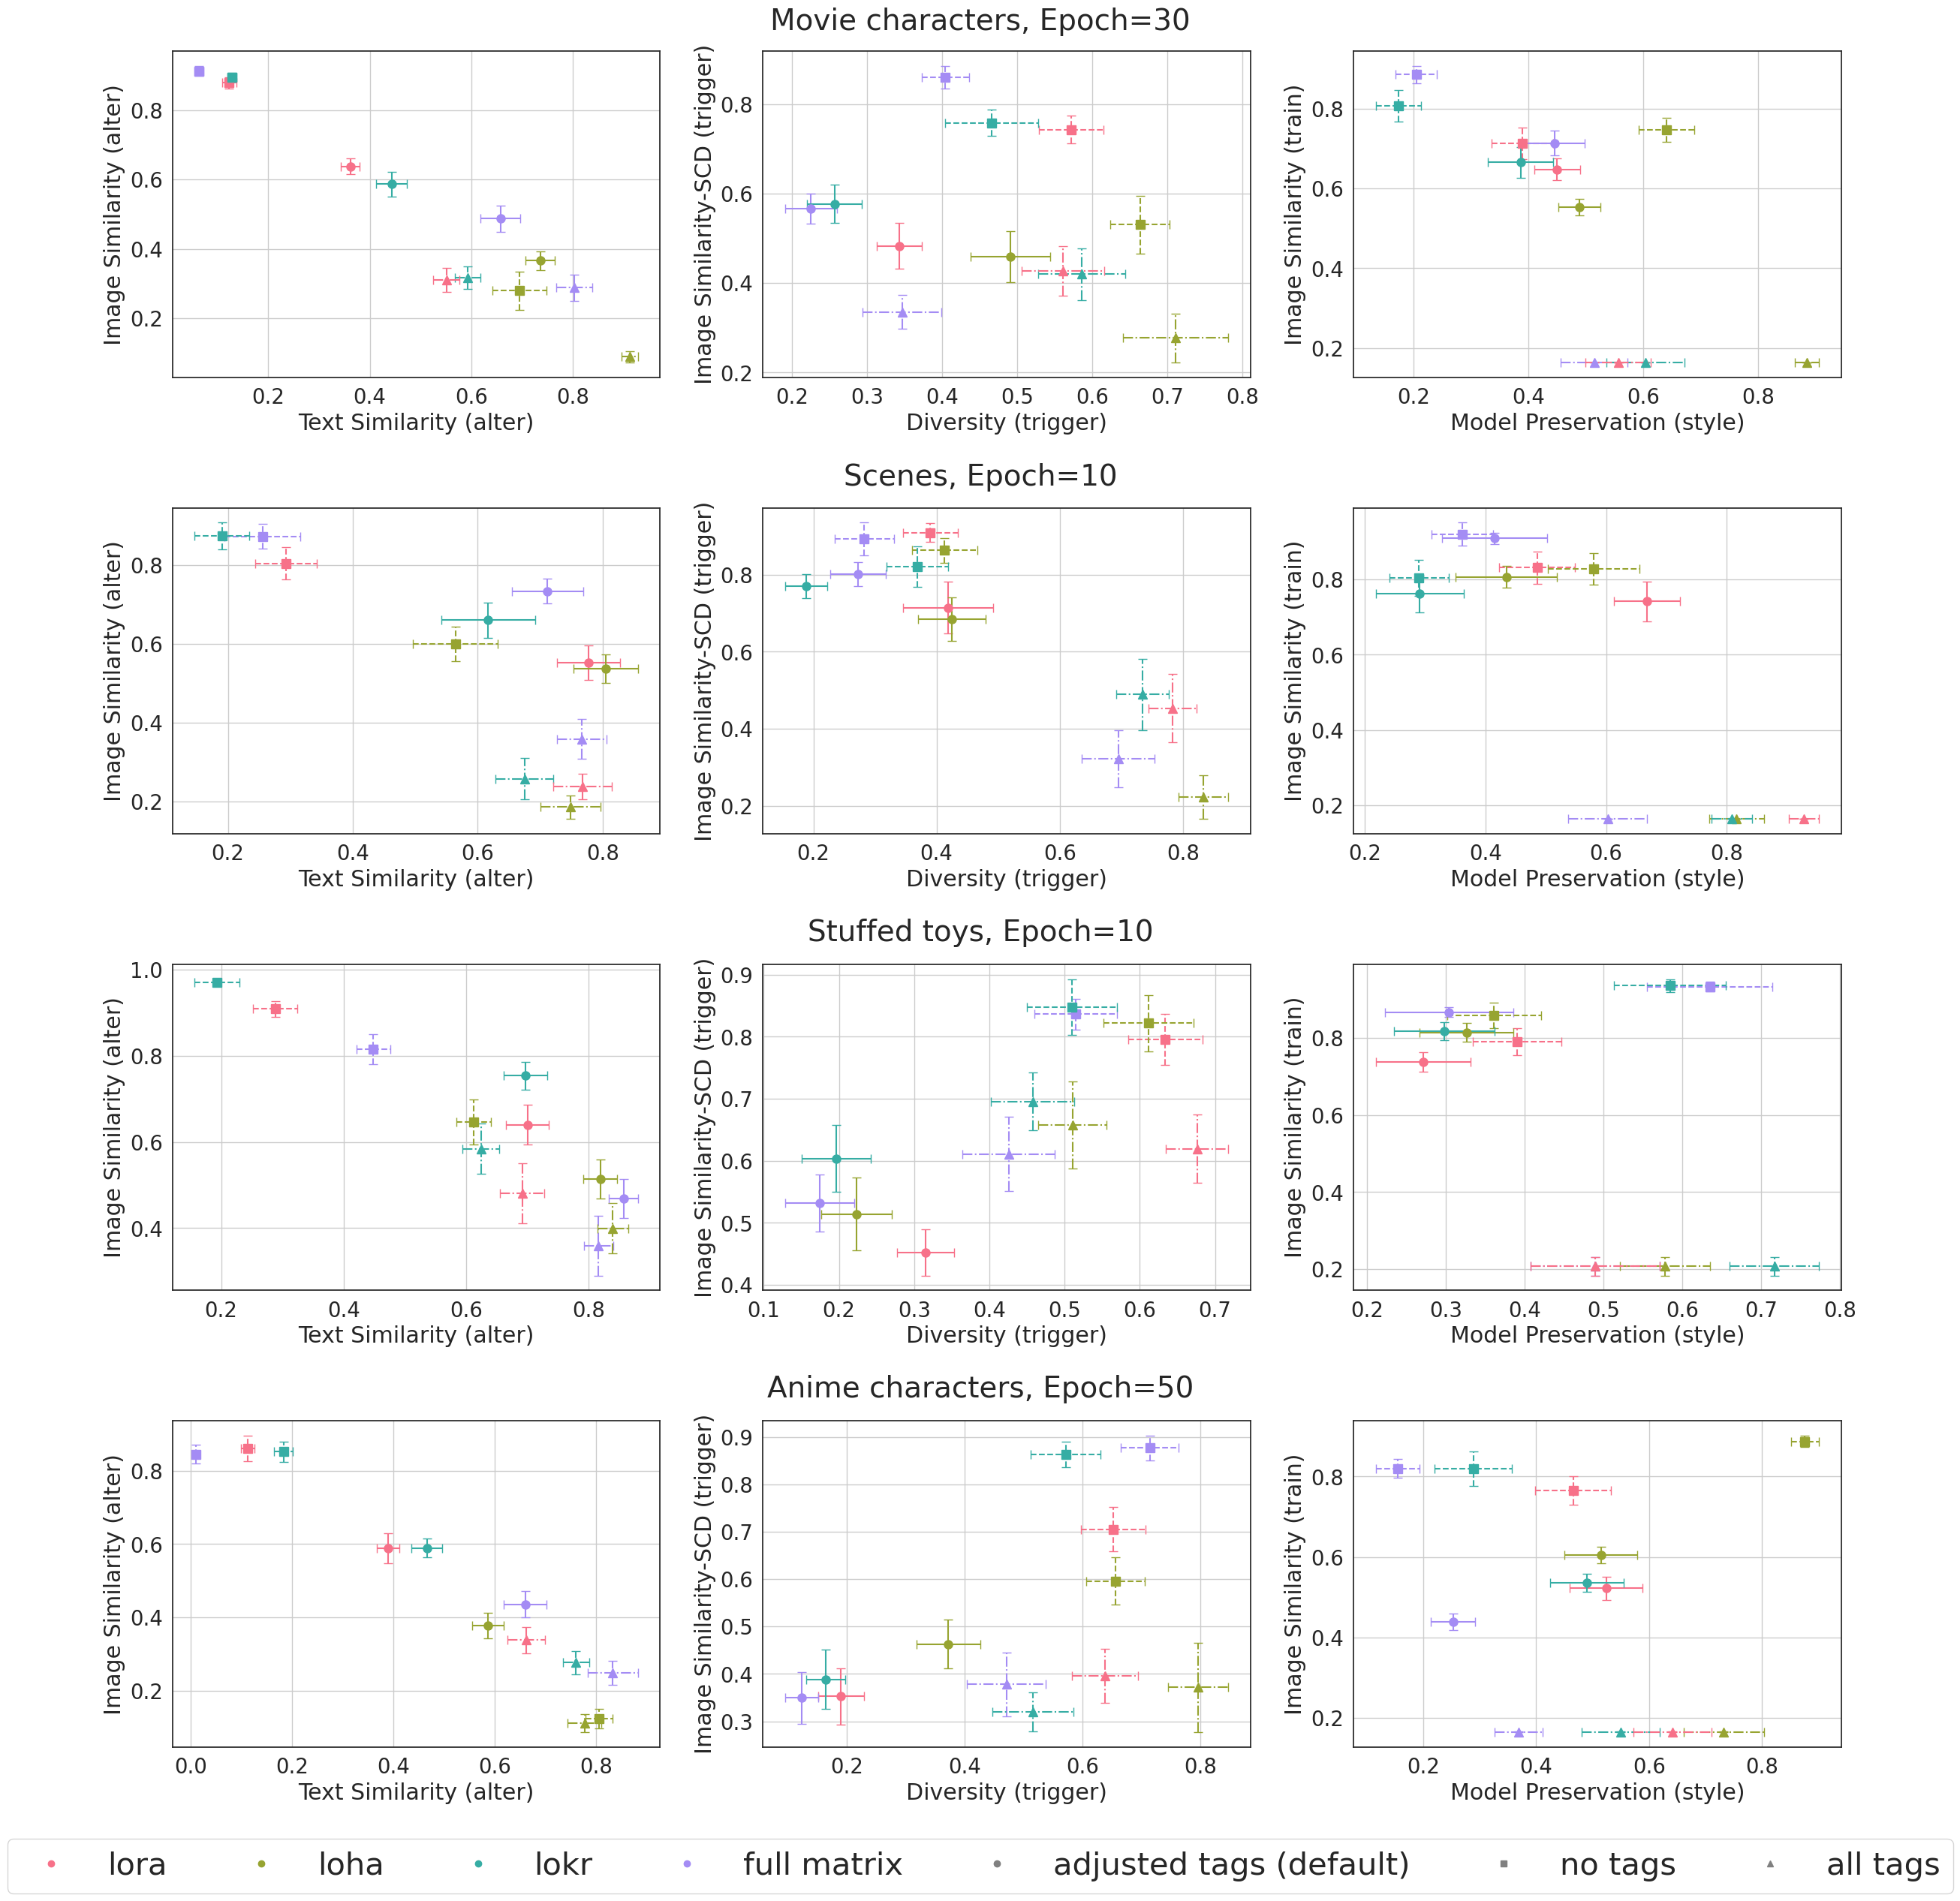

In [7]:
plot_info = [
    (30, 'people', 'Movie characters'),
    (10, 'scene', 'Scenes'),
    (10, 'stuffed_toy', 'Stuffed toys'),
    (50, 'anime', 'Anime characters'),
]

plt.figure(figsize=(24, 24))

for row, (step, category, category_name) in enumerate(plot_info):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.995 - 0.253 * row,
                f'{category_name}, Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(4, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated_all[category],
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Caption',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           fontsize=30,
           bbox_to_anchor=(0.5, -0.045),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'caption_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

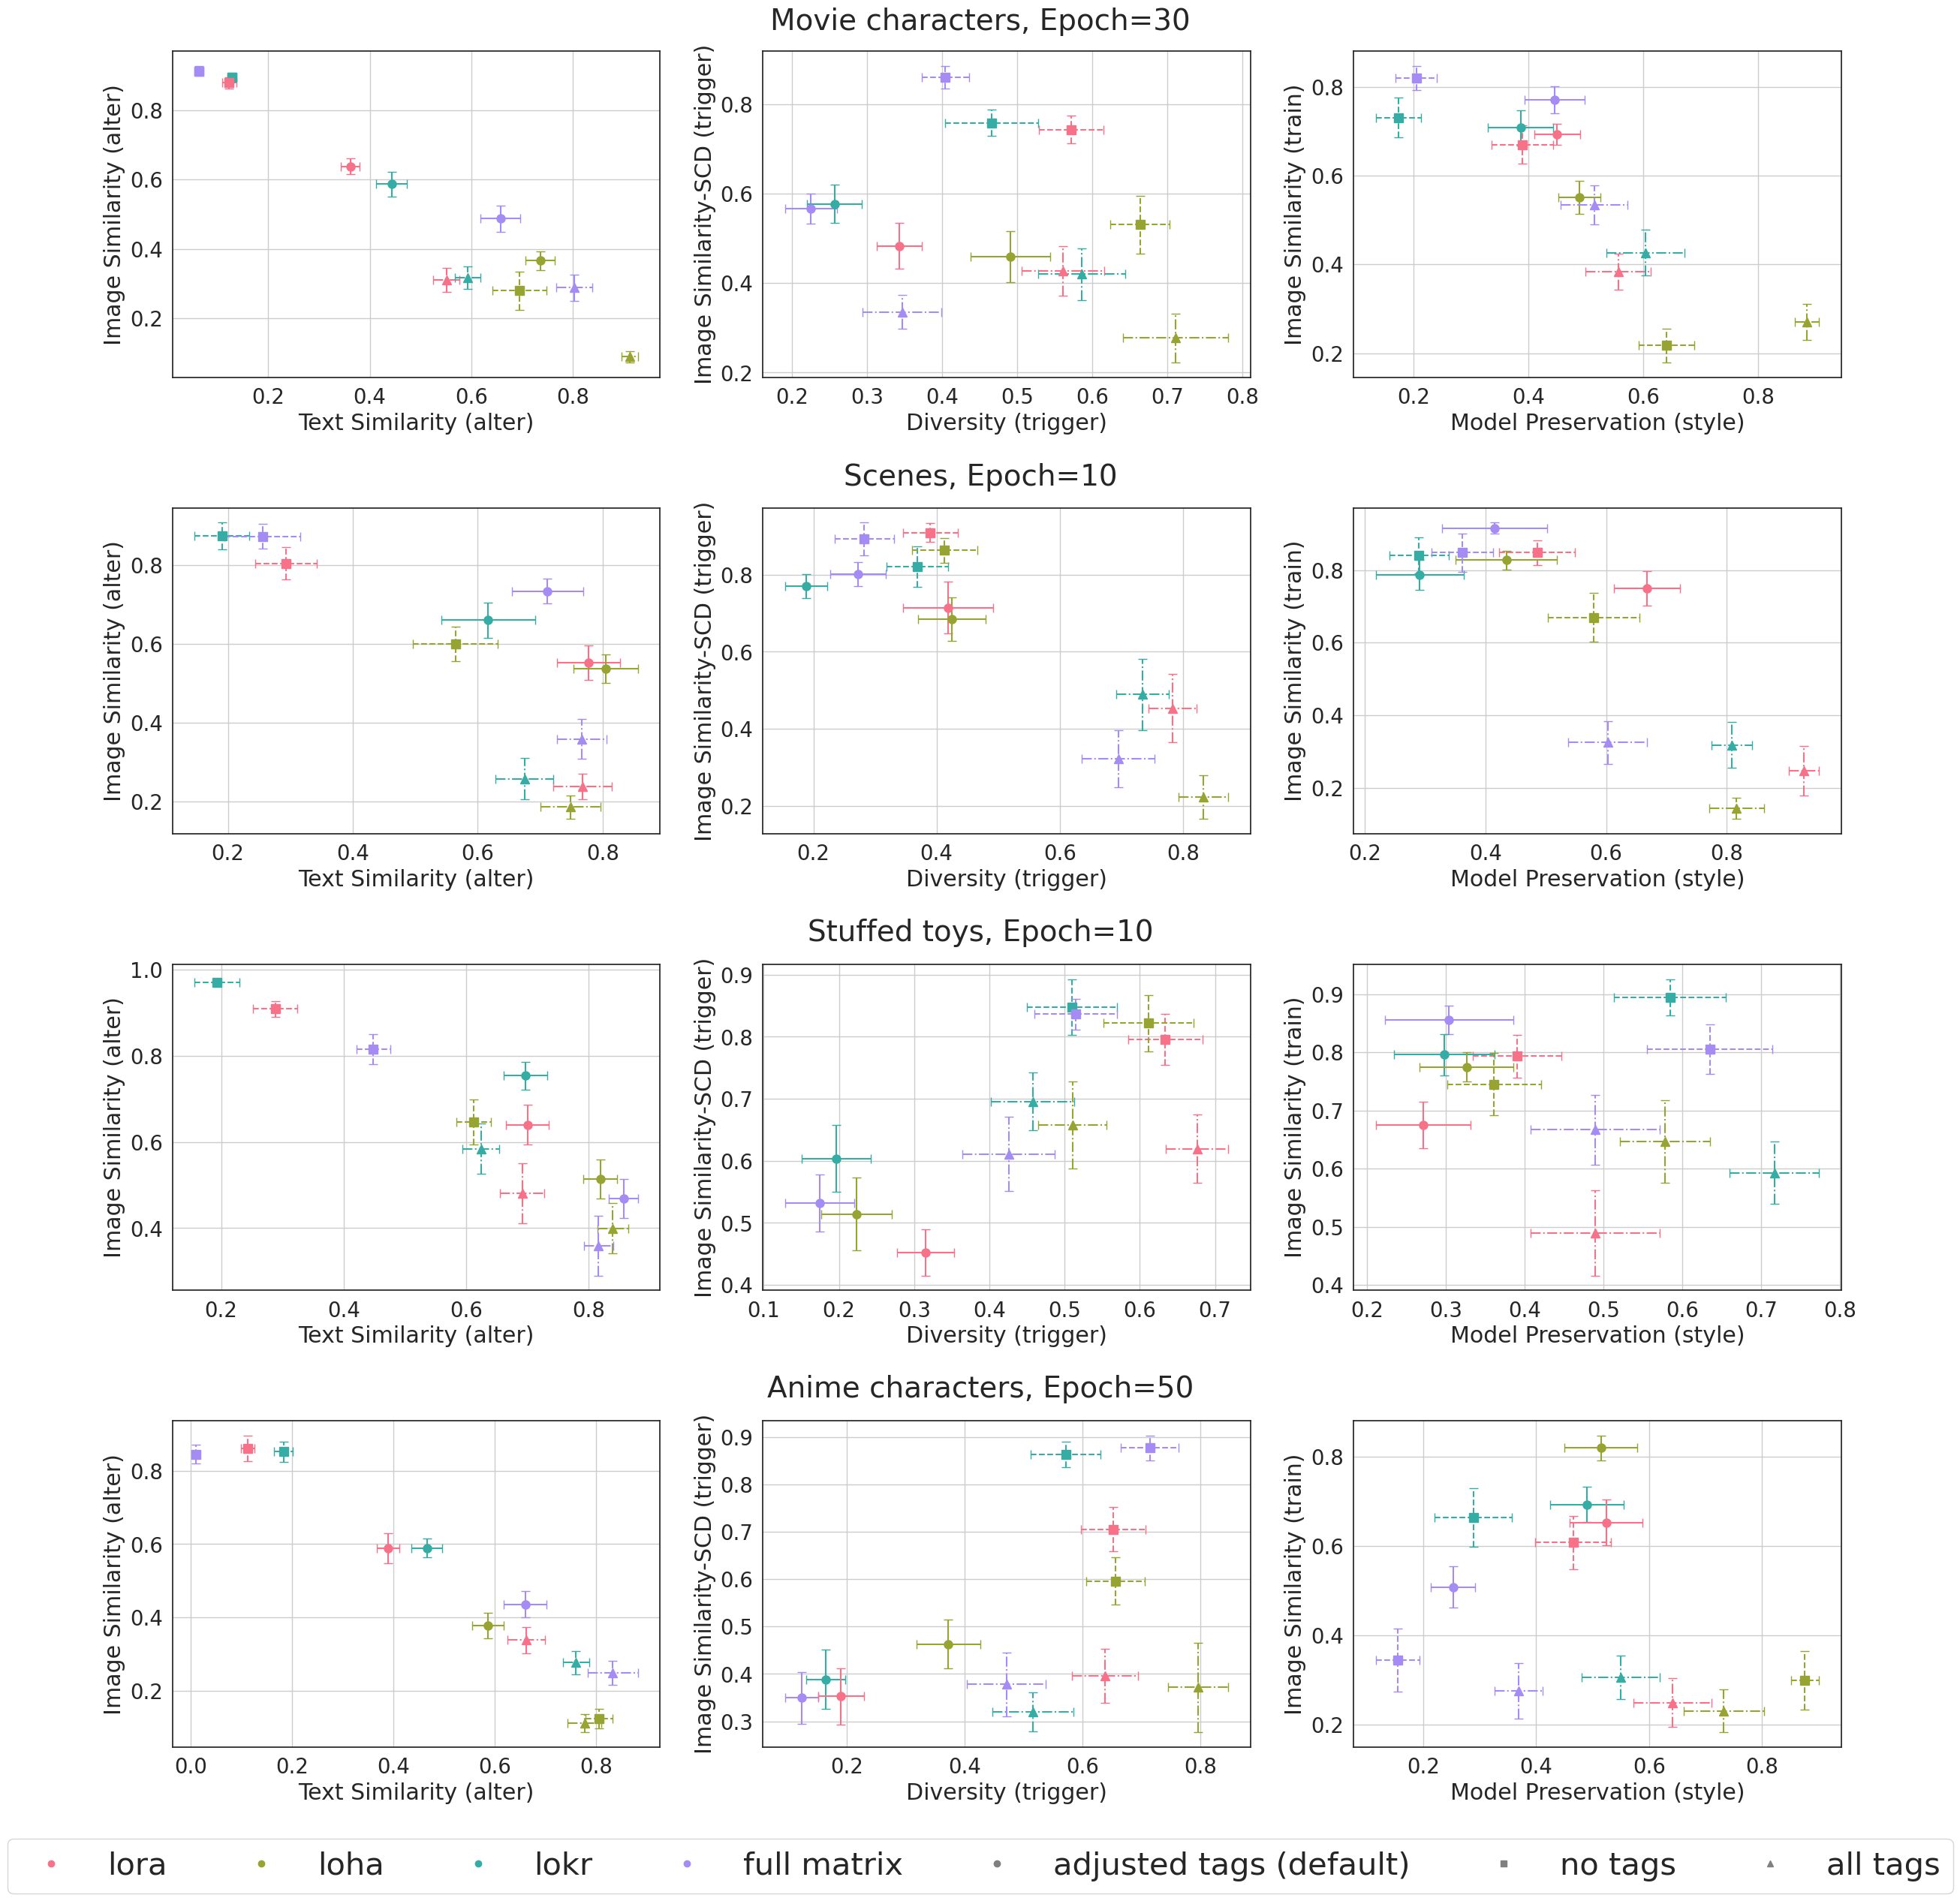

In [17]:
plot_info = [
    (30, 'people', 'Movie characters'),
    (10, 'scene', 'Scenes'),
    (10, 'stuffed_toy', 'Stuffed toys'),
    (50, 'anime', 'Anime characters'),
]

plt.figure(figsize=(24, 24))

for row, (step, category, category_name) in enumerate(plot_info):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.995 - 0.253 * row,
                f'{category_name}, Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(4, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated_all[category],
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Caption',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           fontsize=30,
           bbox_to_anchor=(0.5, -0.045),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'caption_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

In [71]:
category = 'people'

extra_conodition = {
    'Category': category,
}

In [72]:
metrics_aggregated = filter_config_and_aggregate(
    metrics_processed, ['Caption'],
    extra_conodition,
    default_keywords=['1001', '1011', '1021', '1034'])

shape_mapping = {
    '.txt': 'pruned tags (default)',
    '.txtdb': 'no tags',
    '.txttags': 'all tags',
}

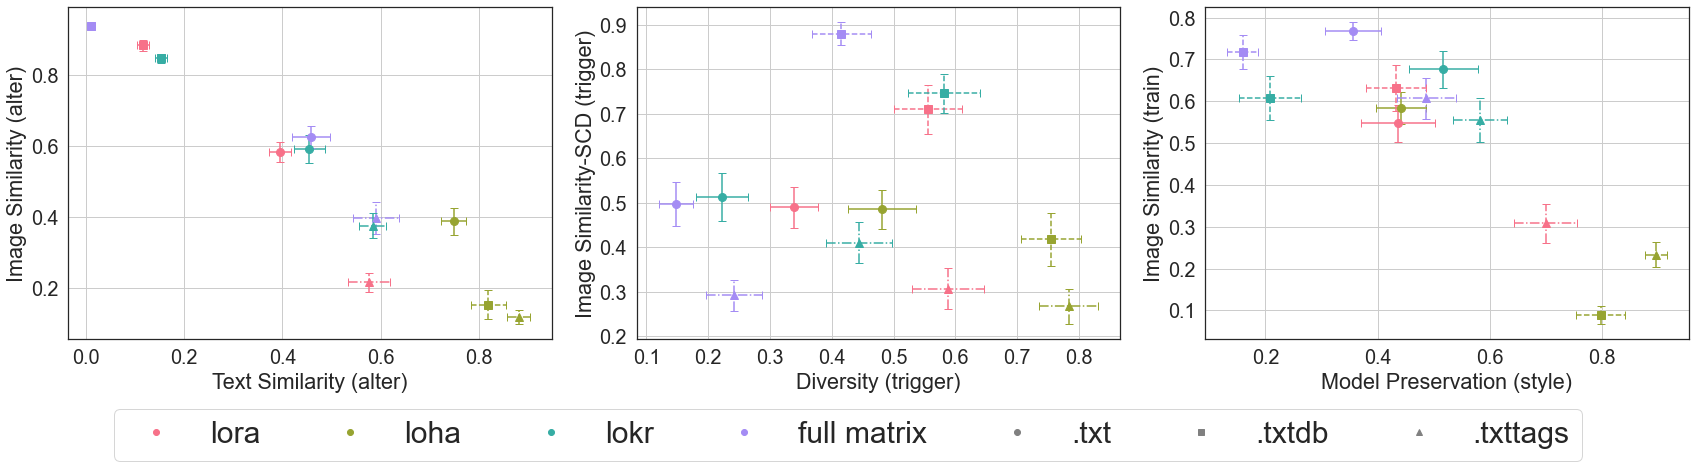

In [73]:
plt.figure(figsize=figsize)

for i, metric_pair in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1)
    legend_handles = plot_metrics_xy(metrics_aggregated,
                                     metric_pair[0],
                                     metric_pair[1],
                                     color_by='Algo',
                                     shape_by='Caption',
                                     legend=False,
                                     step=50)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.14),
           fontsize=30,
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

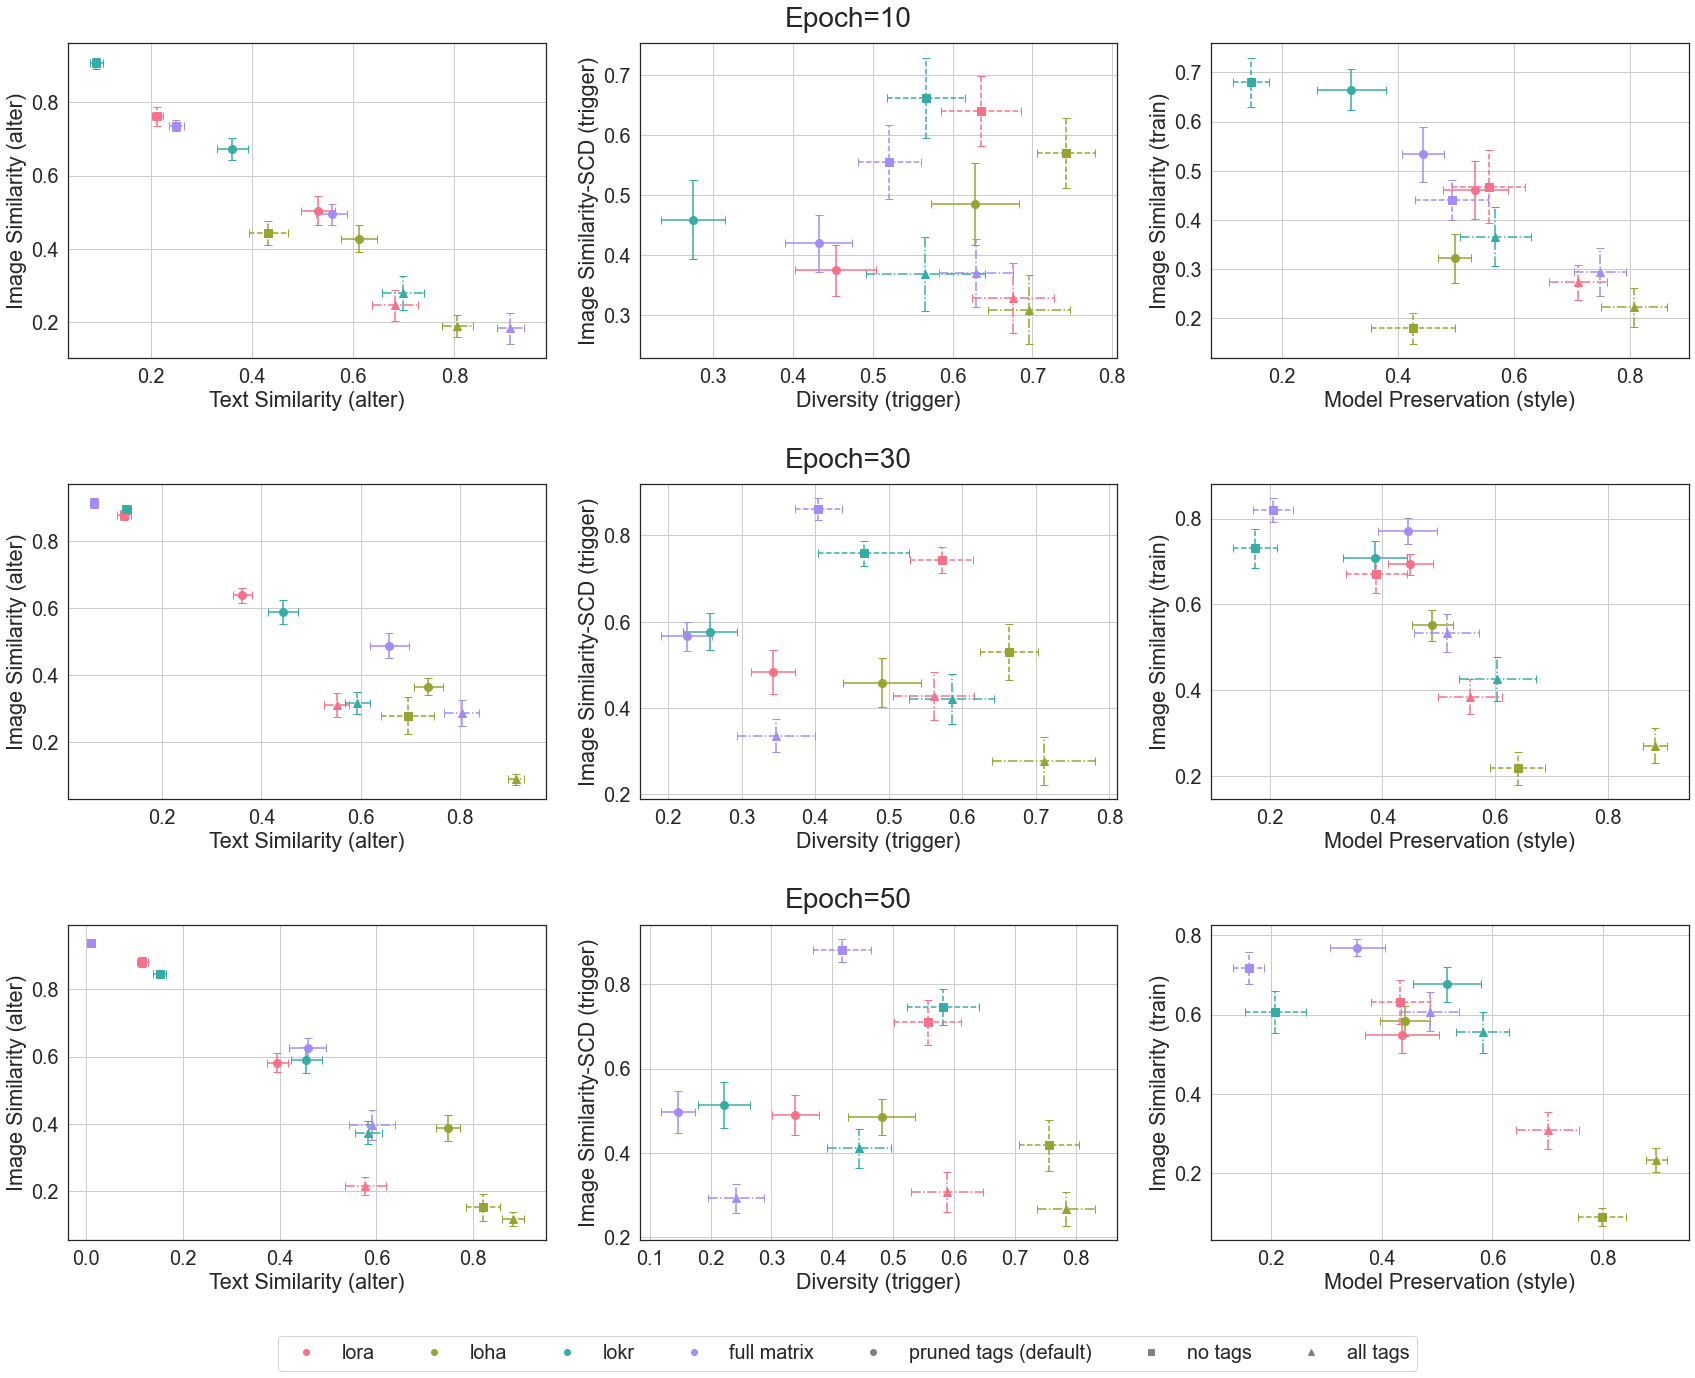

In [74]:
plt.figure(figsize=(24, 18))

for row, step in enumerate([10, 30, 50]):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.99 - 0.34 * row,
                f'Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(3, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Caption',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'caption_{category}_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

# Weight

In [128]:
metrics_file = '../../metrics/reweight_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude)

save_dir = f'figures/add-reweight/'
os.makedirs(save_dir, exist_ok=True)

In [129]:
keywords_to_exclude = ['1002', '1012', '1022']
metrics_processed = metrics_processed[metrics_processed['Config'].apply(
    lambda x: not any(keyword in x for keyword in keywords_to_exclude))]
print(metrics_processed.shape)

(4212, 30)


In [130]:
with display_all_columns():
    display(metrics_processed)

Config  Algo    Preset        Lr      Dim Alpha  \
Architecture                                                                  
Condition                                                                     
0             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
1             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
2             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
3             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
4             exp-1021-sd15-lokrf8  lokr  attn-mlp  0.000500  10000.0   1.0   
...                            ...   ...       ...       ...      ...   ...   
7366              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   
7367              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   
7368              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   
7369              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   
7370              exp-1031-sd15-nt  full  attn-mlp  0.000001      NaN   NaN   

             Factor Caption Seed Step Weight Category                  Class  \
Architecture                                                                   
Condition                                                                      
0               8.0    .txt    a   30   1.00    scene            scene_canal   
1               8.0    .txt    a   30   1.00    scene           scene_garden   
2               8.0    .txt    a   30   1.00    scene        scene_waterfall   
3               8.0    .txt    a   30   1.00    scene           scene_castle   
4               8.0    .txt    a   30   1.00    scene       scene_sculpture1   
...             ...     ...  ...  ...    ...      ...                    ...   
7366            NaN    .txt    b   10   0.85    style                ukiyo_e   
7367            NaN    .txt    b   10   0.85    style          impressionism   
7368            NaN    .txt    b   10   0.85    style  vladimir_borovikovsky   
7369            NaN    .txt    b   10   0.85    style         pencil_drawing   
7370            NaN    .txt    b   10   0.85    style                  ghibi   

             Subclass Image Similarity                      \
Architecture            DINOv2-padding                       
Condition                           in       out   trigger   
0                             0.297872  0.734043  0.484043   
1                             0.430851  0.452128  0.797872   
2                             0.069149  0.606383  0.361702   
3                             0.601064  0.648936  0.180851   
4                             0.069149  0.707447  0.122340   
...               ...              ...       ...       ...   
7366                          0.877660  0.329787  0.047872   
7367                          0.904255  0.244681  0.388298   
7368                          0.936170  0.739362  0.914894   
7369                          0.627660  0.074468  0.489362   
7370                          0.792553  0.276596  0.340426   

             Squared Centroid Distance                     Style Loss          \
Architecture            DINOv2-padding                          Vgg19           
Condition                           in       out   trigger base model  in out   
0                             0.175532  0.462766  0.191489   0.696809 NaN NaN   
1                             0.313830  0.351064  0.574468   0.468085 NaN NaN   
2                             0.058511  0.313830  0.196809   0.356383 NaN NaN   
3                             0.398936  0.547872  0.218085   0.574468 NaN NaN   
4                             0.058511  0.547872  0.063830   0.308511 NaN NaN   
...                                ...       ...       ...        ...  ..  ..   
7366                          0.063830  0.611702  0.069149        NaN NaN NaN   
7367                          0.792553  0.654255  0.595745        NaN NaN NaN   
7368                          0.994681  

In [131]:
category = 'scene'

extra_conodition = {
    'Category': category,
}

In [132]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed, ['Weight'],
                                                 extra_conodition)

shape_mapping = {
    1: 'scale=1',
    0.85: 'scale=0.85',
    0.7: 'scale=0.7',
}

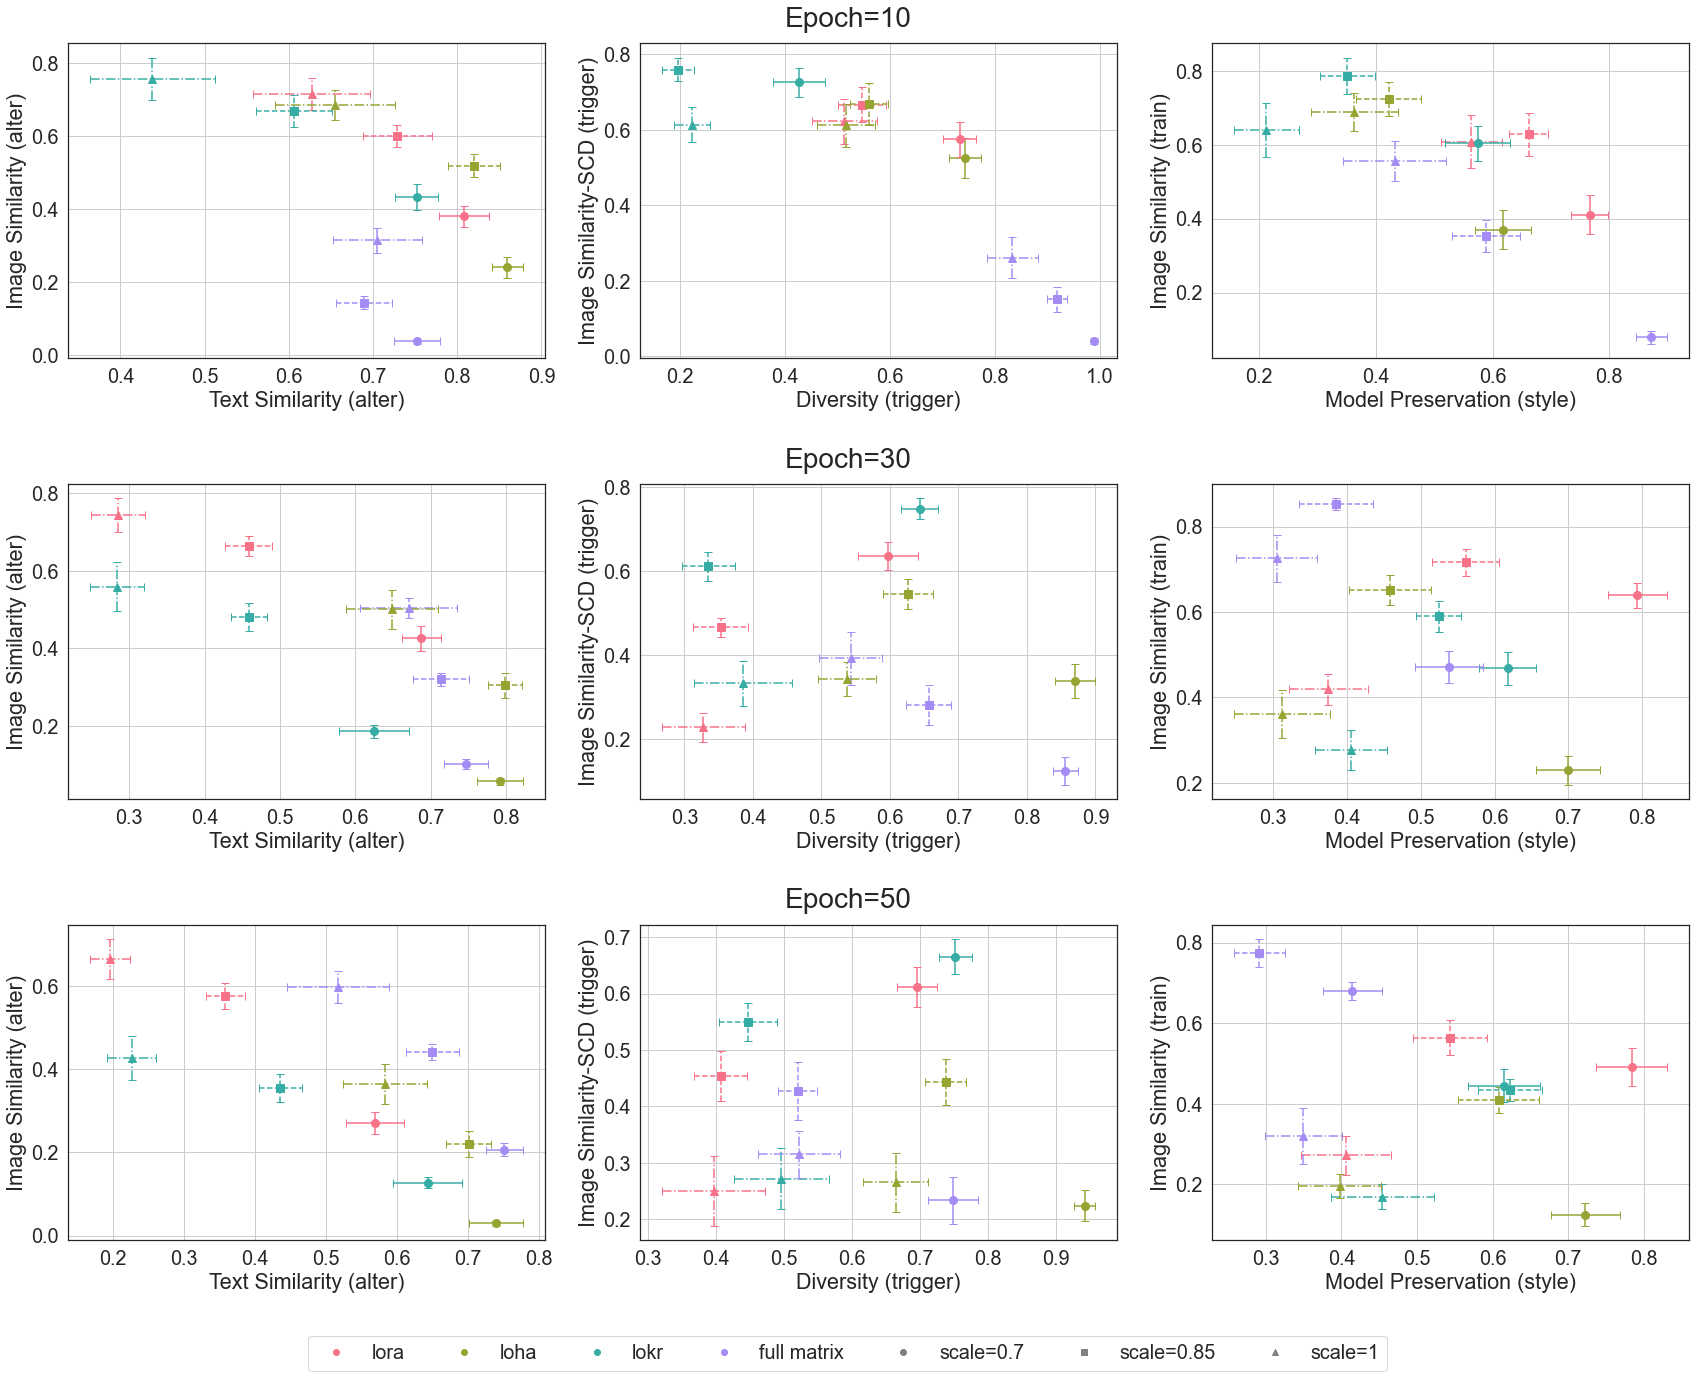

In [133]:
plt.figure(figsize=(24, 18))

for row, step in enumerate([10, 30, 50]):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.99 - 0.34 * row,
                f'Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(3, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Weight',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'reweight-base_{category}_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)

### Larger network

In [113]:
metrics_file = '../../metrics/reweight_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude)

save_dir = f'figures/add-reweight/'
os.makedirs(save_dir, exist_ok=True)

In [114]:
keywords_to_exclude = ['1001', '1011', '1021']
metrics_processed = metrics_processed[metrics_processed['Config'].apply(
    lambda x: not any(keyword in x for keyword in keywords_to_exclude))]
print(metrics_processed.shape)

(4212, 30)


In [125]:
category = 'anime'

extra_conodition = {
    'Category': category,
}

In [126]:
metrics_aggregated = filter_config_and_aggregate(
    metrics_processed, ['Weight'],
    extra_conodition,
    default_keywords=['1002', '1012', '1022', '1031'])

shape_mapping = {
    1: 'scale=1',
    0.85: 'scale=0.85',
    0.7: 'scale=0.7',
}

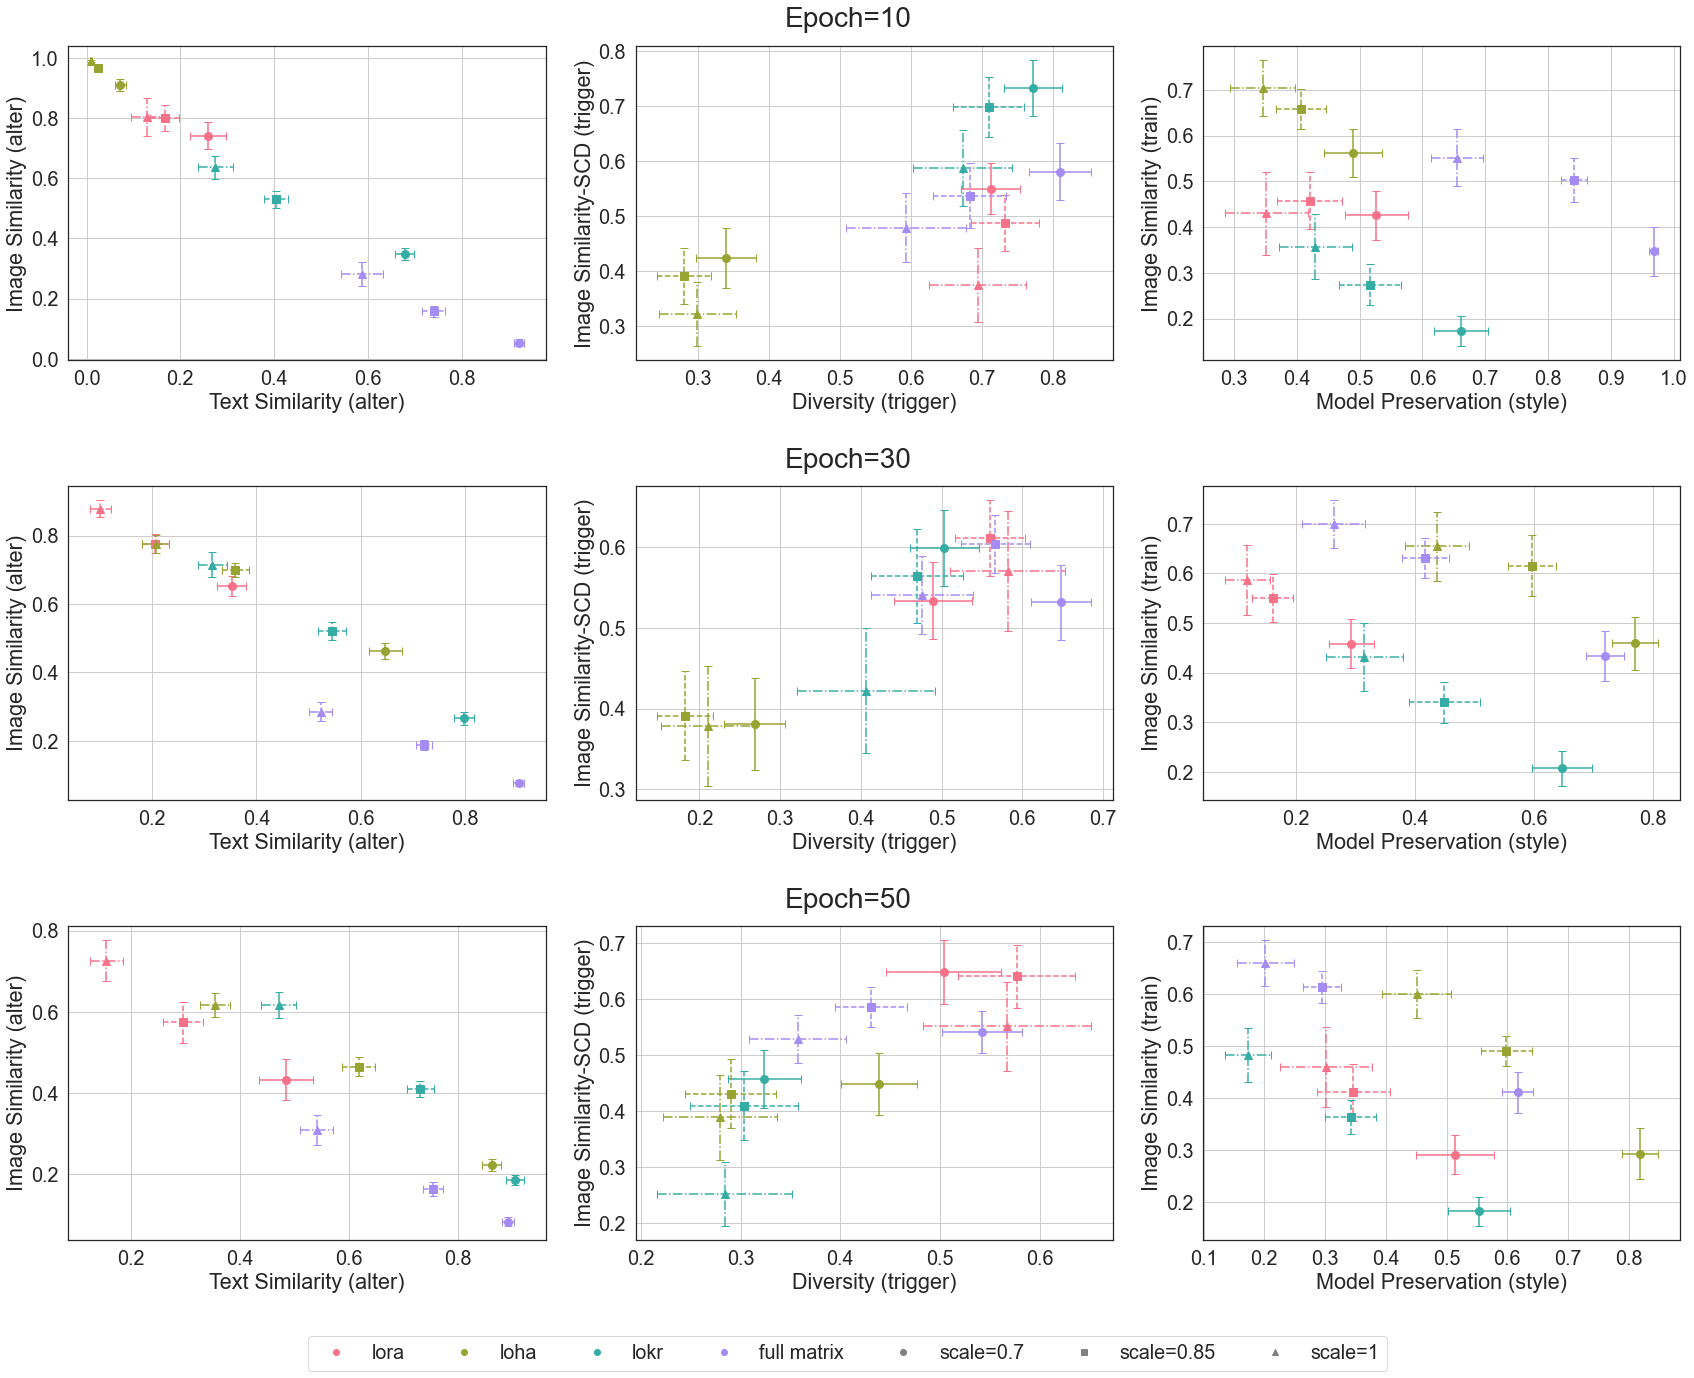

In [127]:
plt.figure(figsize=(24, 18))

for row, step in enumerate([10, 30, 50]):

    # Add a subtitle to the top of each row of subplots
    plt.figtext(0.5,
                0.99 - 0.34 * row,
                f'Epoch={step}',
                ha='center',
                va='bottom',
                fontsize=28)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(3, 3, row * 3 + i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Weight',
                                         legend=False,
                                         shape_mapping=shape_mapping,
                                         step=step)

fig = plt.gcf()

fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(legend_handles))
plt.tight_layout()
# Adjust the height of the space between subplots
fig.subplots_adjust(hspace=0.4)

for ext in ['.png', '.pdf']:
    plt.savefig(os.path.join(save_dir, f'reweight-large_{category}_xyplot' + ext),
                bbox_inches='tight',
                pad_inches=0.2)